In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_table("/MusaddiqueHussainLabs/ml_github_issue_classifier/data/raw/github_issues_full.tsv")
df

,ID,Area,Title,Description
0,17,area-System.Xml,Some XPath.XDocument tests are failing,Some XPath.XDocument queries have different re...
1,20,area-System.Xml,2 XPath.XDocument tests fail because of lackin...,XPath.XDocument navigator doesn't support Move...
2,22,area-System.Numerics,Two Numerics Tests are failing only on our CI ...,Two of the tests in our System.Numerics.Vector...
3,36,area-System.Numerics,SIMD test failures on non-ENU configurations.,After pulling both of @adamralph 's pull reque...
4,41,area-System.Numerics,Quaternion operator overloads should be using ...,Quaternion declares a handful of methods to pe...
...,...,...,...,...
16281,29329,area-System.ComponentModel,Port System.ComponentModel.Composition.Registr...,"Greetings, regarding [Port System.Component..."
16282,29331,area-Infrastructure,"[Perf] Ubuntu16.04 runs blocked by multiple ""P...",[perf_ubuntu16.04_release](https://ci2.dot.net...
16283,29334,area-System.Net,Check URI scheme length only after verifying t...,URI construction is failing on valid URIs unde...
16284,29337,area-System.Net,Unify setting null CookieContainer behavior on...,For HttpClientHandler layer (above the WinHttp...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16286 entries, 0 to 16285
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           16286 non-null  int64 
 1   Area         16286 non-null  object
 2   Title        16286 non-null  object
 3   Description  15699 non-null  object
dtypes: int64(1), object(3)
memory usage: 509.1+ KB


In [6]:
df.describe()

,ID
count,16286.000000
mean,16708.317021
std,7936.181164
min,17.000000
25%,10934.250000
50%,17499.500000
75%,23432.750000
max,29338.000000


In [7]:
df.isnull().sum()

ID               0
Area             0
Title            0
Description    587
dtype: int64

In [8]:
df[df['Description'].isnull()]

,ID,Area,Title,Description
36,218,area-System.Console,Add tests for System.Console library,NaN
55,255,area-System.Text,Improve Dictionary access,NaN
89,348,area-Meta,Updated README.md with recently added projects,NaN
103,396,area-Meta,Update README.md description of legacy collect...,NaN
106,410,area-Meta,Update readme to reflect System.Collections.Co...,NaN
...,...,...,...,...
16190,29195,area-Infrastructure,Adding default initialization for AgentToolsPath,NaN
16192,29197,area-Infrastructure,Adding default initialization of variable Agen...,NaN
16193,29198,area-Infrastructure,Adding begin/end steps to build definitions,NaN
16194,29199,area-Infrastructure,Adding begin/end steps to build definitions an...,NaN


In [9]:
df['Description_null'] = np.where(df['Description'].isnull(), 1 , 0)

In [10]:
df['Description_null'].mean() *100

3.604322731180155

In [11]:
df_missing_data = df[df['Description_null'] == 1]
df_missing_data

,ID,Area,Title,Description,Description_null
36,218,area-System.Console,Add tests for System.Console library,NaN,1
55,255,area-System.Text,Improve Dictionary access,NaN,1
89,348,area-Meta,Updated README.md with recently added projects,NaN,1
103,396,area-Meta,Update README.md description of legacy collect...,NaN,1
106,410,area-Meta,Update readme to reflect System.Collections.Co...,NaN,1
...,...,...,...,...,...
16190,29195,area-Infrastructure,Adding default initialization for AgentToolsPath,NaN,1
16192,29197,area-Infrastructure,Adding default initialization of variable Agen...,NaN,1
16193,29198,area-Infrastructure,Adding begin/end steps to build definitions,NaN,1
16194,29199,area-Infrastructure,Adding begin/end steps to build definitions an...,NaN,1


In [134]:
df_missing_data['Title']

36                    Add tests for System.Console library
55                               Improve Dictionary access
89          Updated README.md with recently added projects
103      Update README.md description of legacy collect...
106      Update readme to reflect System.Collections.Co...
                               ...                        
12842                        Area-Serialization Sprint 125
12843                Microsoft.XmlSerializer.Generator RTM
12860                 Make SGEN public methods be internal
12887             Add Last-Modified to HttpResponseHeaders
12927         Rename MemoryHandle.PinnedPointer to Pointer
Name: Title, Length: 506, dtype: object

In [27]:
missing_col = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
missing_col

['Description']

In [28]:
len(df[missing_col].dropna()) / len(df)

0.9639567726881985

In [29]:
new_df = df[missing_col].dropna()
new_df

,Description
0,Some XPath.XDocument queries have different re...
1,XPath.XDocument navigator doesn't support Move...
2,Two of the tests in our System.Numerics.Vector...
3,After pulling both of @adamralph 's pull reque...
4,Quaternion declares a handful of methods to pe...
...,...
16281,"Greetings, regarding [Port System.Component..."
16282,[perf_ubuntu16.04_release](https://ci2.dot.net...
16283,URI construction is failing on valid URIs unde...
16284,For HttpClientHandler layer (above the WinHttp...


In [138]:
# new_df.shape()

In [139]:
# new_df.hist(bins=50, figsize=(12, 12))
# plt.show()

In [12]:
df.shape

(16286, 5)

In [13]:
df.columns

Index(['ID', 'Area', 'Title', 'Description', 'Description_null'], dtype='object')

In [14]:
df.nunique()

ID                  16286
Area                   22
Title               16088
Description         15571
Description_null        2
dtype: int64

In [15]:
df.duplicated().value_counts()

False    16286
Name: count, dtype: int64

In [16]:
df['Area'].value_counts()

Area
area-System.Net               4303
area-Infrastructure           1901
area-System.IO                1301
area-System.Runtime           1176
area-System.Security           958
area-Serialization             741
area-System.Data               717
area-System.Linq               654
area-System.Diagnostics        615
area-Meta                      585
area-System.Collections        446
area-System.Memory             408
area-System.Reflection         393
area-System.Xml                314
area-System.Threading          309
area-System.ComponentModel     245
area-System.Drawing            235
area-System.Globalization      231
area-System.Numerics           228
area-Microsoft.CSharp          226
area-System.Text               161
area-System.Console            139
Name: count, dtype: int64

In [17]:
area_names = df['Area'].value_counts().index
area_names

Index(['area-System.Net', 'area-Infrastructure', 'area-System.IO',
       'area-System.Runtime', 'area-System.Security', 'area-Serialization',
       'area-System.Data', 'area-System.Linq', 'area-System.Diagnostics',
       'area-Meta', 'area-System.Collections', 'area-System.Memory',
       'area-System.Reflection', 'area-System.Xml', 'area-System.Threading',
       'area-System.ComponentModel', 'area-System.Drawing',
       'area-System.Globalization', 'area-System.Numerics',
       'area-Microsoft.CSharp', 'area-System.Text', 'area-System.Console'],
      dtype='object', name='Area')

In [18]:
area_values = df['Area'].value_counts().values
area_values

array([4303, 1901, 1301, 1176,  958,  741,  717,  654,  615,  585,  446,
        408,  393,  314,  309,  245,  235,  231,  228,  226,  161,  139],
      dtype=int64)

([<matplotlib.patches.Wedge at 0x1dff6a84110>,
 [Text(0.7423188122094616, 0.8117652253206799, 'area-System.Net'),
  Text(-0.48441515279526853, 0.9875940257729068, 'area-Infrastructure'),
  Text(-0.9668624855009447, 0.5245730970331357, 'area-System.IO'),
  Text(-1.0997953472959117, 0.02121777712827367, 'area-System.Runtime'),
  Text(-1.0164095044696202, -0.42060874839192436, 'area-System.Security'),
  Text(-0.8269129706990622, -0.7254067403117042, 'area-Serialization'),
  Text(-0.5930811324021635, -0.9264204069365958, 'area-System.Data'),
  Text(-0.33029844773118977, -1.0492392174458438, 'area-System.Linq'),
  Text(-0.06616371953493985, -1.0980083616335998, 'area-System.Diagnostics'),
  Text(0.18750607719407383, -1.0839010429994476, 'area-Meta'),
  Text(0.3979594426692218, -1.0254892890666398, 'area-System.Collections'),
  Text(0.5607454103667928, -0.9463427416917072, 'area-System.Memory'),
  Text(0.699707036744631, -0.8487697348103593, 'area-System.Reflection'),
  Text(0.80860770977068

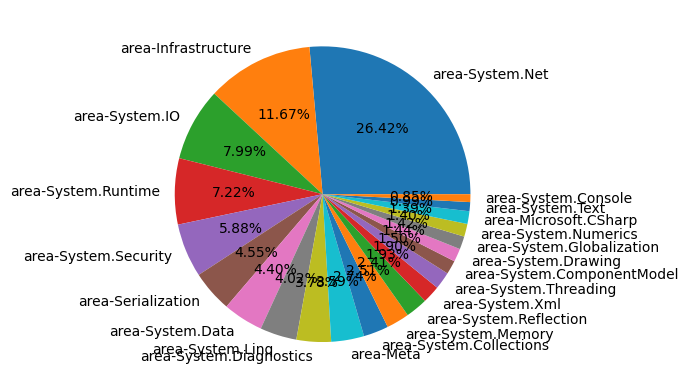

In [19]:
from matplotlib import pyplot
pyplot.pie(area_values, labels=area_names, autopct='%1.2f%%')

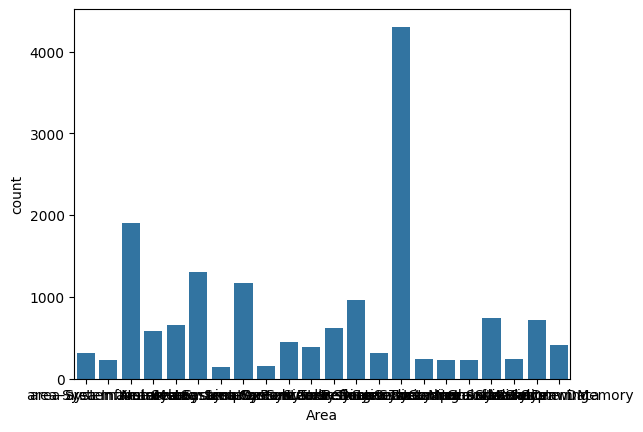

In [20]:
sns.countplot(x=df['Area'], data=df)
plt.show()

In [21]:
df.columns

Index(['ID', 'Area', 'Title', 'Description', 'Description_null'], dtype='object')

In [22]:
feature_name = df[['ID', 'Title', 'Description']]
target_variable = df['Area']

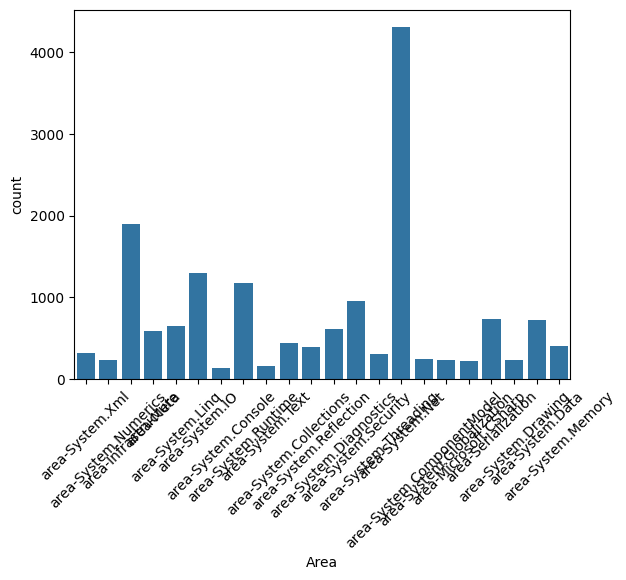

In [23]:
sns.countplot(x='Area', data=df)
plt.xticks(rotation=45)
plt.show()

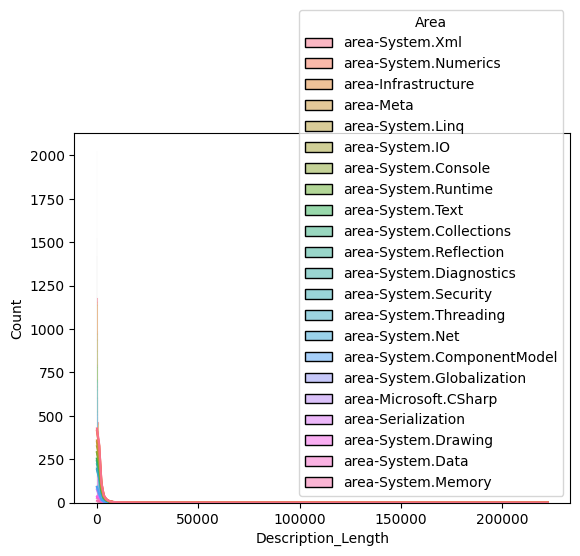

In [24]:
df['Description_Length'] = df['Description'].apply(lambda x: len(str(x)))
sns.histplot(data=df, x='Description_Length', hue='Area', multiple='stack', kde=True)
plt.show()

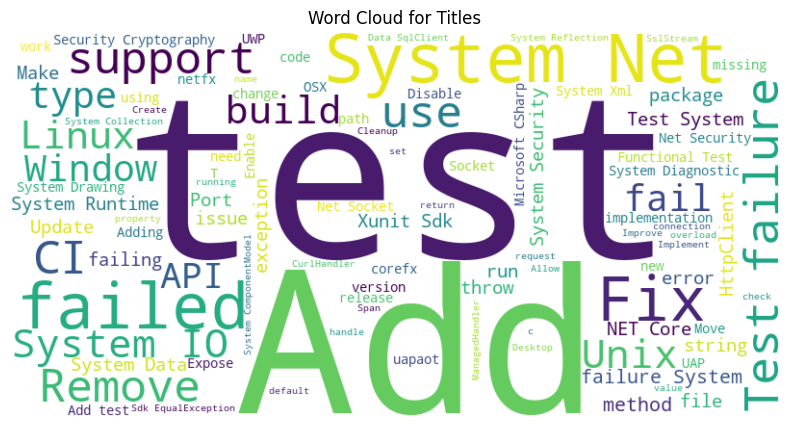

In [25]:
from wordcloud import WordCloud

# Visualize the word cloud for 'Title'
title_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(df['Title']))
plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Titles')
plt.show()

<Axes: xlabel='count', ylabel='Area'>

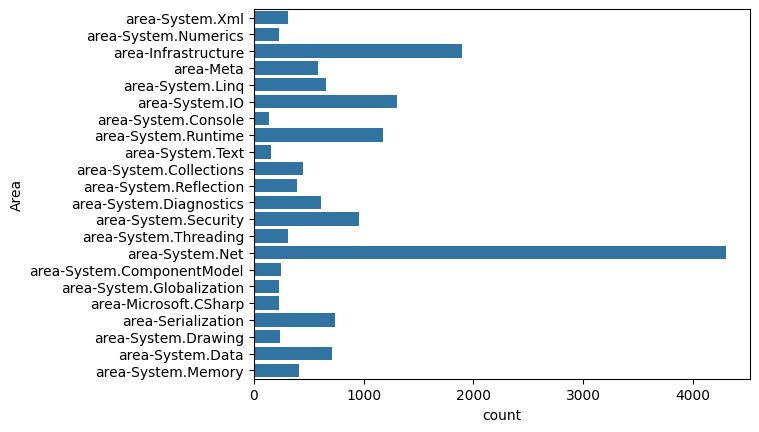

In [26]:
sns.countplot(df['Area'])